### • CONTEXT: 
A communications equipment manufacturing company has a product which is responsible for emitting informative signals.
Company wants to build a machine learning model which can help the company to predict the equipment’s signal quality using various
parameters.

#### IMPORT ALL THE REQUIRED PACKAGES

In [227]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats 
import matplotlib.pyplot as plt
from tensorflow import keras
%matplotlib inline
#Test Train Split
from sklearn.model_selection import train_test_split
#Feature Scaling library
from sklearn.preprocessing import StandardScaler
#import pickle
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Activation, LeakyReLU
from tensorflow.keras import regularizers, optimizers
from sklearn.metrics import r2_score
from tensorflow.keras.models import load_model
import tensorflow as tf

In [228]:
seed = 7
np.random.seed(seed)

#### Part A - Q1 A - Read the ‘Signals.csv’ as DatFrame and import required libraries.

In [229]:
signals=pd.read_csv(r'C:\Users\samsi\Downloads\Signal.csv')
signals.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [230]:
signals.shape

(1599, 12)

In [231]:
signals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [232]:
signals.dtypes

Parameter 1        float64
Parameter 2        float64
Parameter 3        float64
Parameter 4        float64
Parameter 5        float64
Parameter 6        float64
Parameter 7        float64
Parameter 8        float64
Parameter 9        float64
Parameter 10       float64
Parameter 11       float64
Signal_Strength      int64
dtype: object

#### Part A - Q1 B - Check for missing values and print percentage for each attribute.

In [233]:
signals.isna().sum()

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

In [234]:
percent_missing = signals.isnull().sum() * 100 / len(signals)
missing_value_df = pd.DataFrame({'column_name': signals.columns,
                                 'percent_missing': percent_missing})

In [235]:
missing_value_df

,column_name,percent_missing
Parameter 1,Parameter 1,0.0
Parameter 2,Parameter 2,0.0
Parameter 3,Parameter 3,0.0
Parameter 4,Parameter 4,0.0
Parameter 5,Parameter 5,0.0
Parameter 6,Parameter 6,0.0
Parameter 7,Parameter 7,0.0
Parameter 8,Parameter 8,0.0
Parameter 9,Parameter 9,0.0
Parameter 10,Parameter 10,0.0


- Apart from Signal Strength rest all features are floating point.
- There are no null values in the data.

#### Part A - Q1 C - Check for presence of duplicate records in the dataset and impute with appropriate method.

In [236]:
signals.duplicated()

0       False
1       False
2       False
3       False
4        True
        ...  
1594    False
1595    False
1596     True
1597    False
1598    False
Length: 1599, dtype: bool

In [237]:
dups = signals.duplicated()
signals[dups]

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [238]:
#Drop duplicate values :
new_signals = signals.drop_duplicates(keep=False)

In [239]:
new_signals.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5


In [240]:
new_signals.info

<bound method DataFrame.info of       Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
1             7.8        0.880         0.00          2.6        0.098   
2             7.8        0.760         0.04          2.3        0.092   
3            11.2        0.280         0.56          1.9        0.075   
5             7.4        0.660         0.00          1.8        0.075   
6             7.9        0.600         0.06          1.6        0.069   
...           ...          ...          ...          ...          ...   
1593          6.8        0.620         0.08          1.9        0.068   
1594          6.2        0.600         0.08          2.0        0.090   
1595          5.9        0.550         0.10          2.2        0.062   
1597          5.9        0.645         0.12          2.0        0.075   
1598          6.0        0.310         0.47          3.6        0.067   

      Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
1            25.0

#### Part A - Q1 D - Visualise distribution of the target variable.

In [241]:
new_signals.describe()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
count,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000
mean,8.287884,0.531172,0.273477,2.493635,0.088897,15.929763,47.152766,0.996648,3.308903,0.659306,10.441864,5.608428
std,1.725696,0.188279,0.196370,1.257423,0.052059,10.392575,33.993453,0.001835,0.155179,0.171698,1.099890,0.843334
min,4.600000,0.160000,0.000000,1.200000,0.034000,1.000000,6.000000,0.990200,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.095000,1.900000,0.069000,7.000000,22.000000,0.995540,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996660,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.645000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997800,3.400000,0.720000,11.200000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003200,4.010000,2.000000,14.900000,8.000000


C:\Users\samsi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


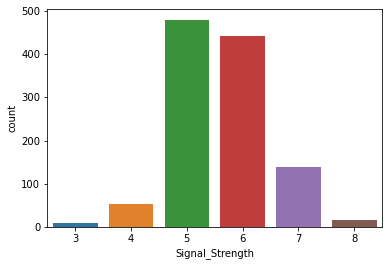

In [242]:
sns.countplot(new_signals['Signal_Strength'])    # Distibution of the column 'Signal_Strength'
plt.show()

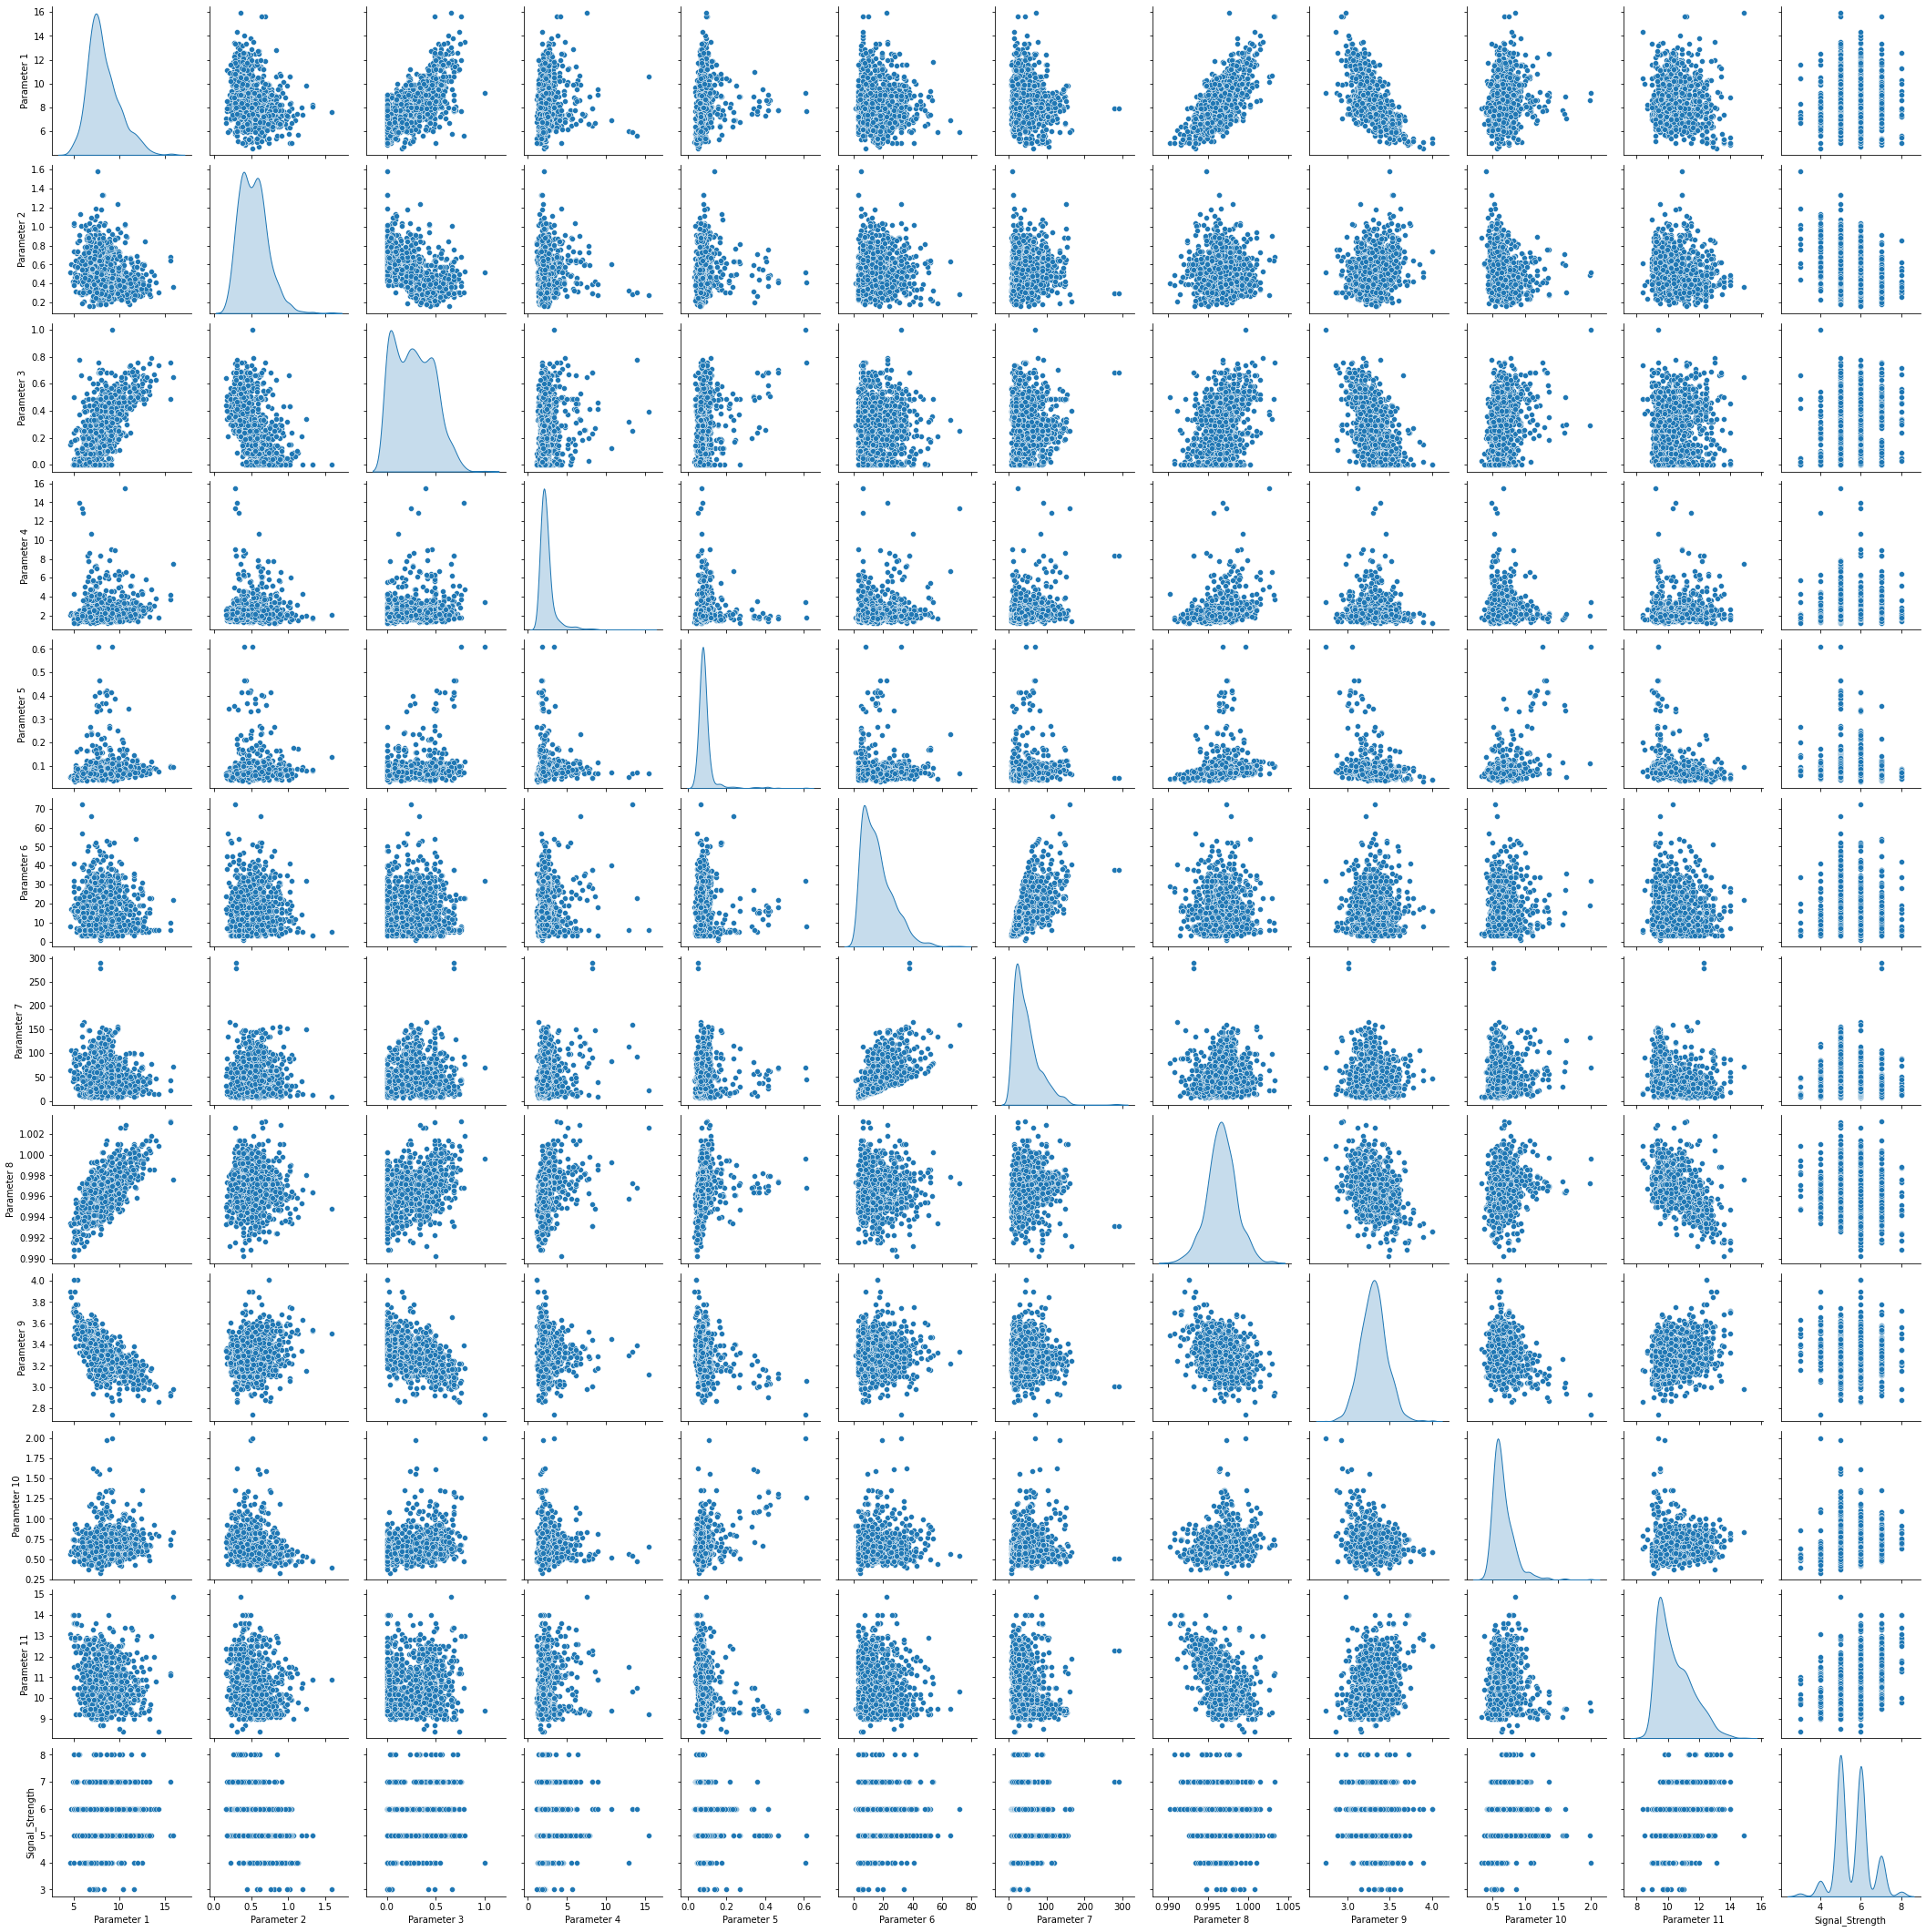

In [243]:
sns.pairplot(new_signals,diag_kind='kde')
plt.show()

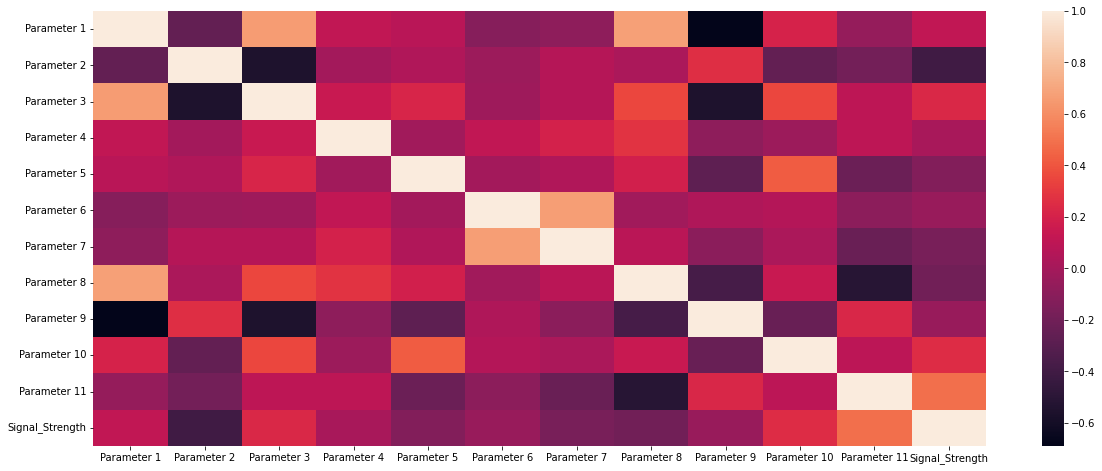

In [244]:
plt.subplots(figsize=(20,8))
sns.heatmap(new_signals.corr())
plt.show()

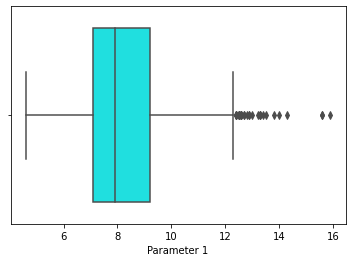

Boxplot of  Parameter 1
Q1 is :  7.1
Q2 is :  7.9
Q3 is :  9.2
IQR is: 2.0999999999999996
Lower Whisker, Upper Whisker :  3.95 , 12.349999999999998
Out of  1139  rows in data, number of outliers are: 33


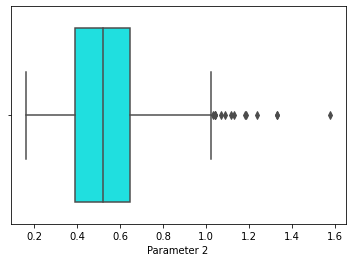

Boxplot of  Parameter 2
Q1 is :  0.39
Q2 is :  0.52
Q3 is :  0.645
IQR is: 0.255
Lower Whisker, Upper Whisker :  0.007500000000000007 , 1.0275
Out of  1139  rows in data, number of outliers are: 14


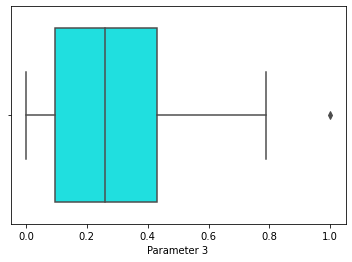

Boxplot of  Parameter 3
Q1 is :  0.095
Q2 is :  0.26
Q3 is :  0.43
IQR is: 0.33499999999999996
Lower Whisker, Upper Whisker :  -0.4075 , 0.9324999999999999
Out of  1139  rows in data, number of outliers are: 1


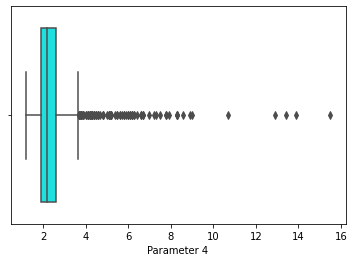

Boxplot of  Parameter 4
Q1 is :  1.9
Q2 is :  2.2
Q3 is :  2.6
IQR is: 0.7000000000000002
Lower Whisker, Upper Whisker :  0.8499999999999996 , 3.6500000000000004
Out of  1139  rows in data, number of outliers are: 98


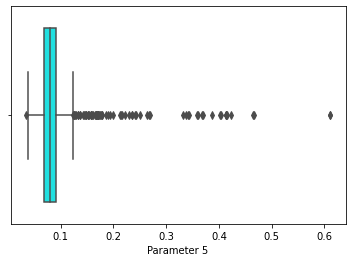

Boxplot of  Parameter 5
Q1 is :  0.069
Q2 is :  0.079
Q3 is :  0.091
IQR is: 0.021999999999999992
Lower Whisker, Upper Whisker :  0.03600000000000002 , 0.12399999999999999
Out of  1139  rows in data, number of outliers are: 74


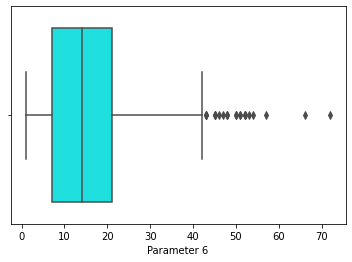

Boxplot of  Parameter 6
Q1 is :  7.0
Q2 is :  14.0
Q3 is :  21.0
IQR is: 14.0
Lower Whisker, Upper Whisker :  -14.0 , 42.0
Out of  1139  rows in data, number of outliers are: 22


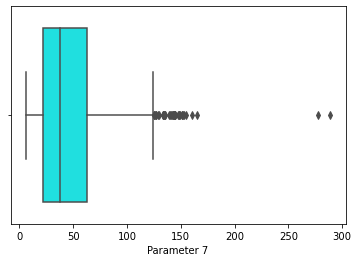

Boxplot of  Parameter 7
Q1 is :  22.0
Q2 is :  38.0
Q3 is :  63.0
IQR is: 41.0
Lower Whisker, Upper Whisker :  -39.5 , 124.5
Out of  1139  rows in data, number of outliers are: 39


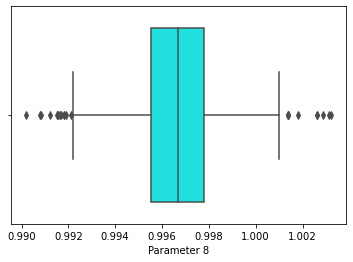

Boxplot of  Parameter 8
Q1 is :  0.99554
Q2 is :  0.99666
Q3 is :  0.9978
IQR is: 0.0022600000000000398
Lower Whisker, Upper Whisker :  0.9921499999999999 , 1.00119
Out of  1139  rows in data, number of outliers are: 23


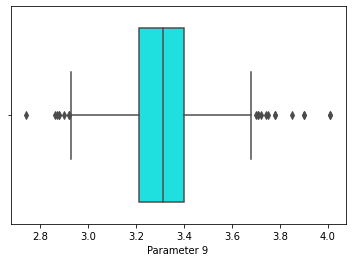

Boxplot of  Parameter 9
Q1 is :  3.21
Q2 is :  3.31
Q3 is :  3.4
IQR is: 0.18999999999999995
Lower Whisker, Upper Whisker :  2.925 , 3.6849999999999996
Out of  1139  rows in data, number of outliers are: 21


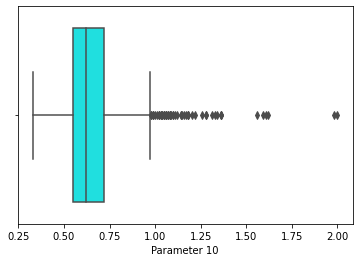

Boxplot of  Parameter 10
Q1 is :  0.55
Q2 is :  0.62
Q3 is :  0.72
IQR is: 0.16999999999999993
Lower Whisker, Upper Whisker :  0.29500000000000015 , 0.9749999999999999
Out of  1139  rows in data, number of outliers are: 56


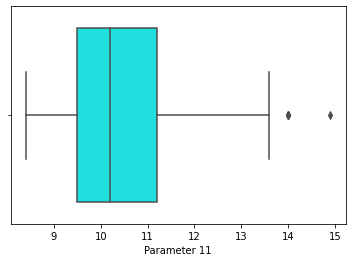

Boxplot of  Parameter 11
Q1 is :  9.5
Q2 is :  10.2
Q3 is :  11.2
IQR is: 1.6999999999999993
Lower Whisker, Upper Whisker :  6.950000000000001 , 13.749999999999998
Out of  1139  rows in data, number of outliers are: 6


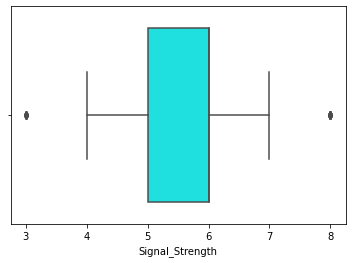

Boxplot of  Signal_Strength
Q1 is :  5.0
Q2 is :  6.0
Q3 is :  6.0
IQR is: 1.0
Lower Whisker, Upper Whisker :  3.5 , 7.5
Out of  1139  rows in data, number of outliers are: 26


In [245]:
# Checking the presence of outliers
l = len(new_signals)
col = list(new_signals.columns)
#col.remove('condition')
for i in np.arange(len(col)):
    sns.boxplot(x= new_signals[col[i]], color='cyan')
    plt.show()
    print('Boxplot of ',col[i])
    #calculating the outiers in attribute 
    Q1 = new_signals[col[i]].quantile(0.25)
    Q2 = new_signals[col[i]].quantile(0.50)
    Q3 = new_signals[col[i]].quantile(0.75) 
    IQR = Q3 - Q1
    L_W = (Q1 - 1.5 *IQR)
    U_W = (Q3 + 1.5 *IQR)    
    print('Q1 is : ',Q1)
    print('Q2 is : ',Q2)
    print('Q3 is : ',Q3)
    print('IQR is:',IQR)
    print('Lower Whisker, Upper Whisker : ',L_W,',',U_W)
    bools = (new_signals[col[i]] < (Q1 - 1.5 *IQR)) |(new_signals[col[i]] > (Q3 + 1.5 * IQR))
    print('Out of ',l,' rows in data, number of outliers are:',bools.sum())   #calculating the number of outliers

<AxesSubplot:>

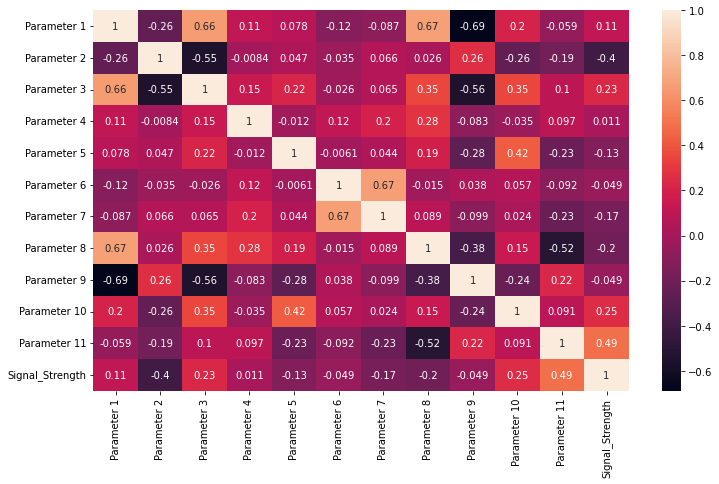

In [246]:
# studying correlation between the attributes
b_corr=new_signals.corr()
plt.subplots(figsize =(12, 7)) 
sns.heatmap(b_corr,annot=True)

#### Part A - Q1 E - Share insights from the initial data analysis (at least 2).

- Parameter 6 and Parameter 7 are highly correlated with each other and visce versa.
- Parameter 4 is has very low correlation with other Parameters.
- Parameter 1 is positively correlated to Parameter 3.
- Parameter 4 has the highest number of outliers which is 98.

#### Part A - Q2 A - Split the data into X & Y.

In [247]:
X = new_signals.drop("Signal_Strength", axis=1)
y = new_signals['Signal_Strength']

In [248]:
# splitting to create test data
X_vtrain, X_test, y_vtrain, y_test = train_test_split(X, y, test_size=.30, random_state=seed)

In [249]:
X_vtrain.shape

(797, 11)

In [250]:
y_vtrain.shape

(797,)

#### Part A - Q2 B - Split the data into train & test with 70:30 proportion.

In [251]:
X_train, X_test, y_train, y_test = train_test_split(X_vtrain, y_vtrain, test_size=.30, random_state=seed)

In [252]:
X_train.shape

(557, 11)

#### Part A - Q2 C - Print shape of all the 4 variables and verify if train and test data is in sync.

In [253]:
# Scaling train data
X_Train_S = StandardScaler().fit_transform(X_train) 

# Scaling test data
X_Test_S = StandardScaler().fit_transform(X_test)

In [254]:
from keras.utils.np_utils import to_categorical
Y_Train = to_categorical(y_train)
Y_Test = to_categorical(y_test)

In [255]:
# Confirming Matrix size
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(557, 11)
(240, 11)
(557,)
(240,)


- **Both train and test data is in sync.**

#### Part A - Q2 D - Normalise the train and test data with appropriate method.

In [300]:
# Independent variables
X=new_signals.drop('Signal_Strength',axis=1)

# Target variable
Y=new_signals['Signal_Strength']               

X_Train,X_Test,Y_Train,Y_Test=train_test_split(X, Y, train_size=0.7, random_state=12)

In [301]:
# Scaling train data
X_Train_S = StandardScaler().fit_transform(X_Train) 

# Scaling test data
X_Test_S = StandardScaler().fit_transform(X_Test)

In [303]:
Y_Train = to_categorical(Y_Train)
Y_Test = to_categorical(Y_Test)

In [304]:
    # Confirming Matrix size
    print(X_Train_S.shape)
    print(X_Test_S.shape)
    print(Y_Train.shape)
    print(Y_Test.shape)

(797, 11)
(342, 11)
(797, 9)
(342, 9)


#### Part A - Q2 E - Transform Labels into format acceptable by Neural Network.

In [305]:
# save the model
model_reg.save("model_reg.h5") #using h5 extension
print("model saved!!!")

model saved!!!


In [306]:
model_rr = load_model('model_reg.h5')

In [307]:
y_pred = model_rr.predict(X_test)

8/8 [==============================] - 0s 1ms/step


In [308]:
print(y_pred[0])
print(y_pred[1])
print(y_pred[2])
print(y_pred[3])
print(y_pred[4])

[5.6048717]
[5.1901503]
[6.0265694]
[4.9569674]
[5.244555]


In [309]:
print(y_test.head())

362     5
282     5
1048    6
451     6
582     5
Name: Signal_Strength, dtype: int64


In [310]:
score_r = r2_score(y_test,y_pred)
print(score_r)

0.4335205713126348


In [311]:
model_rr.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_2 (Batc  (None, 11)               44        
 hNormalization)                                                 
                                                                 
 dense_13 (Dense)            (None, 1)                 12        
                                                                 
Total params: 56
Trainable params: 34
Non-trainable params: 22
_________________________________________________________________


#### Part A - Q3 A - Design a Neural Network to train a classifier.

In [312]:
from sklearn.ensemble import ExtraTreesClassifier

[0.07831347 0.0978303  0.07958281 0.07863949 0.07635451 0.07380053
 0.10131475 0.08159335 0.0794323  0.10084583 0.15229267]


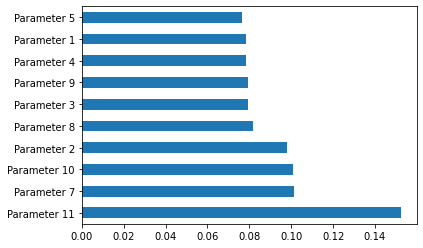

In [313]:
model = ExtraTreesClassifier()
model.fit(X,y)

#using inbuilt class "feature_importances" of tree based classifiers
print(model.feature_importances_) 

#plotting graph of feature importances
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

#### Part A - Q3 B - Train the classifier using previously designed Architecture.

In [314]:
NN_model_Classifier = Sequential()

# The Input Layer :
NN_model_Classifier.add(Dense(128, kernel_initializer='normal',input_dim = X_Train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model_Classifier.add(Dense(64, kernel_initializer='normal',activation='relu'))  # sigmoid, tanh

NN_model_Classifier.add(Dense(32, kernel_initializer='normal'))
NN_model_Classifier.add(LeakyReLU(alpha=0.1))

NN_model_Classifier.add(Dense(16, kernel_initializer='normal'))
NN_model_Classifier.add(LeakyReLU(alpha=0.1))


# The Output Layer :
NN_model_Classifier.add(Dense(9, kernel_initializer='normal',activation='softmax'))  # except softmax

# Compile the network :
NN_model_Classifier.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])
NN_model_Classifier.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_65 (Dense)            (None, 128)               1536      
                                                                 
 dense_66 (Dense)            (None, 64)                8256      
                                                                 
 dense_67 (Dense)            (None, 32)                2080      
                                                                 
 leaky_re_lu_30 (LeakyReLU)  (None, 32)                0         
                                                                 
 dense_68 (Dense)            (None, 16)                528       
                                                                 
 leaky_re_lu_31 (LeakyReLU)  (None, 16)                0         
                                                                 
 dense_69 (Dense)            (None, 9)               

In [315]:
EPOCH=400
Network_Classifier=NN_model_Classifier.fit(X_Train_S, Y_Train, validation_data=(X_Test_S,Y_Test), epochs=EPOCH, batch_size=200)

Epoch 1/400
4/4 [==============================] - 1s 39ms/step - loss: 0.1975 - accuracy: 0.2723 - val_loss: 0.1974 - val_accuracy: 0.4561
Epoch 2/400
4/4 [==============================] - 0s 11ms/step - loss: 0.1973 - accuracy: 0.4279 - val_loss: 0.1973 - val_accuracy: 0.4123
Epoch 3/400
4/4 [==============================] - 0s 10ms/step - loss: 0.1972 - accuracy: 0.4253 - val_loss: 0.1971 - val_accuracy: 0.4123
Epoch 4/400
4/4 [==============================] - 0s 9ms/step - loss: 0.1970 - accuracy: 0.4241 - val_loss: 0.1968 - val_accuracy: 0.4152
Epoch 5/400
4/4 [==============================] - 0s 9ms/step - loss: 0.1967 - accuracy: 0.4266 - val_loss: 0.1965 - val_accuracy: 0.4181
Epoch 6/400
4/4 [==============================] - 0s 9ms/step - loss: 0.1963 - accuracy: 0.4329 - val_loss: 0.1960 - val_accuracy: 0.4240
Epoch 7/400
4/4 [==============================] - 0s 9ms/step - loss: 0.1957 - accuracy: 0.4241 - val_loss: 0.1951 - val_accuracy: 0.4269
Epoch 8/400
4/4 [=======

#### Part A - Q3 C - Plot 2 separate visuals. i. Training Loss and Validation Loss ii. Training Accuracy and Validation Accuracy.

**i. Training Loss and Validation Loss**

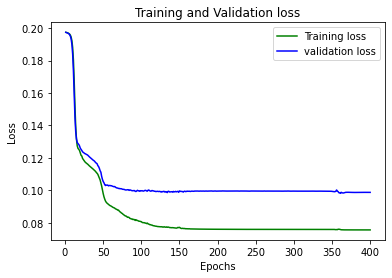

In [318]:
loss_train = Network_Classifier.history['loss']
loss_val = Network_Classifier.history['val_loss']
epochs = range(1,EPOCH+1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**ii. Training Accuracy and Validation Accuracy**

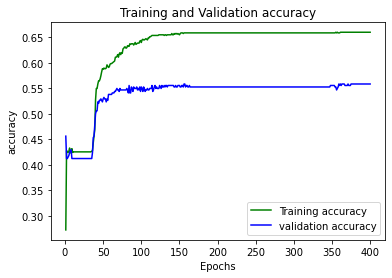

In [320]:
Acc_train = Network_Classifier.history['accuracy']
Acc_val = Network_Classifier.history['val_accuracy']
epochs = range(1,EPOCH+1)
plt.plot(epochs, Acc_train, 'g', label='Training accuracy')
plt.plot(epochs, Acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

#### Part A - Q3 D - Design new architecture/update existing architecture in attempt to improve the performance of the model.

In [347]:
model_class = Sequential()
model_class.add(Dense(11, activation='relu'))
model_class.add(Dense(8, activation='relu'))
model_class.add(Dense(8, activation='softmax'))

In [349]:
model_class.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="sgd")

# Fit the model
#model_class.fit(x=Xc_train, y=yc_train, batch_size=20, epochs=100, validation_data=(Xc_val, yc_val))

In [350]:
model_class.save("model_class.h5") #using h5 extension
print("model saved!!!")

model saved!!!


In [351]:
model_class = load_model('model_class.h5')

In [352]:
y_pred_cls = model_class.predict(Xc_test)

11/11 [==============================] - 0s 792us/step


In [353]:
print(y_pred_cls[0])
print(y_pred_cls[1])
print(y_pred_cls[2])
print(y_pred_cls[3])
print(y_pred_cls[4])

[5.2841171e-03 9.9471527e-01 1.3827899e-17 1.5085374e-22 1.0067840e-12
 7.0084174e-17 2.7104960e-29 5.7319005e-07]
[8.17611337e-01 1.47560373e-01 3.34920657e-07 4.08502352e-08
 7.07434765e-06 1.50684555e-05 2.21899765e-09 3.48057412e-02]
[8.4745669e-01 8.3333522e-02 1.0159916e-05 3.8701810e-06 8.0626778e-05
 3.1418010e-04 9.0602623e-07 6.8799943e-02]
[8.2773882e-01 9.0023063e-02 3.4281849e-05 1.9261246e-05 1.7556835e-04
 6.9334800e-04 4.6855876e-06 8.1311055e-02]
[7.9549599e-01 1.2194278e-01 6.0601073e-05 1.8508812e-05 5.3821504e-04
 9.4220188e-04 6.1811497e-06 8.0995448e-02]


In [354]:
model_cla.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_73 (Dense)            (None, 11)                132       
                                                                 
 dense_74 (Dense)            (None, 8)                 96        
                                                                 
 dense_75 (Dense)            (None, 8)                 72        
                                                                 
Total params: 300
Trainable params: 300
Non-trainable params: 0
_________________________________________________________________


#### Part A - Q3 E - Plot visuals as in Q3.C and share insights about difference observed in both the models.

In [345]:
from keras.models import model_from_json
import numpy
import os

In [346]:
# Pickle model to JSON
Classifier_model_json = NN_model_Classifier.to_json()
with open("Classifier_model.json", "w") as json_file:
    json_file.write(Classifier_model_json)
# Pickle weights to HDF5
NN_model_Classifier.save_weights("Classifier_model.h5")
print("Saved model to disk")


# load json and create model
json_file = open('Classifier_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("Classifier_model.h5")
print("Loaded model from disk")

# Evaluate
loaded_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X_Test_S,Y_Test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Saved model to disk
Loaded model from disk
accuracy: 55.85%
